## Problem2:
You are hired by a sports analysis agency to understand the selection process of high school football players into college with a full or partial scholarship. 

You are provided details of __6215 high school graduates__ who have been inducted into 4-year degree colleges with __either full or partial scholarships__.
You have to help the agency in __predicting whether a high school graduate will win a full scholarship on the basis of the information given in the data set__.

Also, find out the __important factors__ which are instrumental in winning a full scholarship in colleges.


### Data Dictionary:

|#        |  Variables | Description  |
| - |:---------------| :-----|
| 1 | __Scholarship__ | Won a college scholarship: Full / Partial |
| 2 | __Academic Score__ | High school academic performance of a candidate |
| 3 | __Score on Plays Made__ | A composite score based on the achievements on the field |
| 4 | __Missed Play Score__ | A composite score based on the failures on the field |
| 5 | __Injury Propensity__ | This has 3 ordinal levels: High, Moderate, Normal and Low. It has been calculated based on what proportion of time a candidate had an injury problem |
| 6 | __School Type__ | 3 types of schools based on their location |
| 7 | __School Score__ | A composite score based on the overall achievement of the candidates’ school, based on the schools academic, sports and community service performance |
| 8 | __Overall Score__ | A composite score based on a candidate’s family financial state, school performance, psychosocial attitude etc |
| 9 | __Region__ | Region of the country where the school is located |


### Import the necessary libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv('Football+Scholarship.csv')
df_original.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


In [3]:
df = df_original.copy()

In [4]:
df.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial


## ------------------------     Question1 : EDA (Exploratory Data Analysis) ------------------------------------

__Obejctive of EDA:__

The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any __duplicate observation or missing data and whether the variables have a symmetric or skewed distribution.__ 

Note that data may contain __various types of attributes and numerical and/or visual data summarization techniques__ need to be appropriately decided. 

Both __univariate and bivariate analyses and pre-processing of data__ are important. 

Check for __outliers and comment on removing or keeping them while model building__. 

For this is a classification problem, __the dependence of the response on the predictors needs to be investigated__

In [5]:
# shape of the dataset
df.shape
print(' The number of columns (variables) in the dataset is',df.shape[1],'\n'
,'The number of rows (observations per variable) in the dataset is',df.shape[0])

 The number of columns (variables) in the dataset is 9 
 The number of rows (observations per variable) in the dataset is 6215


In [6]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   object 
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   object 
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


#### Check for the basic measures of descriptive statistics

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Academic_Score,6215,NaN,NaN,NaN,7.21925,1.29224,3.8,6.4,7,7.7,15.9
Score_on_Plays_Made,6215,NaN,NaN,NaN,0.337338,0.160122,0.08,0.23,0.29,0.4,1.33
Missed_Play_Score,6215,NaN,NaN,NaN,0.319537,0.145153,0,0.25,0.31,0.39,1.66
Injury_Propensity,6215,4,Low,2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School_Type,6215,3,C,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School_Score,6215,NaN,NaN,NaN,0.531448,0.147245,0.22,0.43,0.51,0.6,1.98
Overall_Score,6215,NaN,NaN,NaN,10.4568,1.1725,8,9.5,10.2,11.3,14.9
Region,6215,3,Eastern,2835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,6215,2,Partial,4028,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.mode() 

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,6.8,0.28,0.3,Low,C,0.5,9.5,Eastern,Partial


__Insight 1:__ The descriptive statistics indicates there are outliers in the numerical variables. In further analysis,


_Numercial Variables:_

- The __gap between mean and median for all the five numerical variables are minimal.__ 

_Categorical Variables:_

- _Injury Propensity_ has _4_ unique values followed by _School Type with 3,Region with 3_ and _Scholarship with 2_ unique values respectively.

#### Let's Check duplicate values in the dataset

In [10]:
## check duplicates in the dataset
df_duplicate = df.duplicated()
print('There are',df_duplicate.sum(), 'records in the dataset which are duplicates')

There are 947 records in the dataset which are duplicates


### As in the dataset, these records are of students and we dont have unique identifier (which is student id). Hence, let's not drop these duplicate values in the dataset.

#### Let's Check missing values in the dataset

In [11]:
## check is there any null data in the dataset
df.isnull().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

#### Let's check skewness in the dataset

In [12]:
df.skew() #it gives the details around skewness in the dataset.

Academic_Score         1.750576
Score_on_Plays_Made    1.405692
Missed_Play_Score      0.492118
School_Score           1.733181
Overall_Score          0.601023
dtype: float64

#### Let's Check Outliers in the dataset

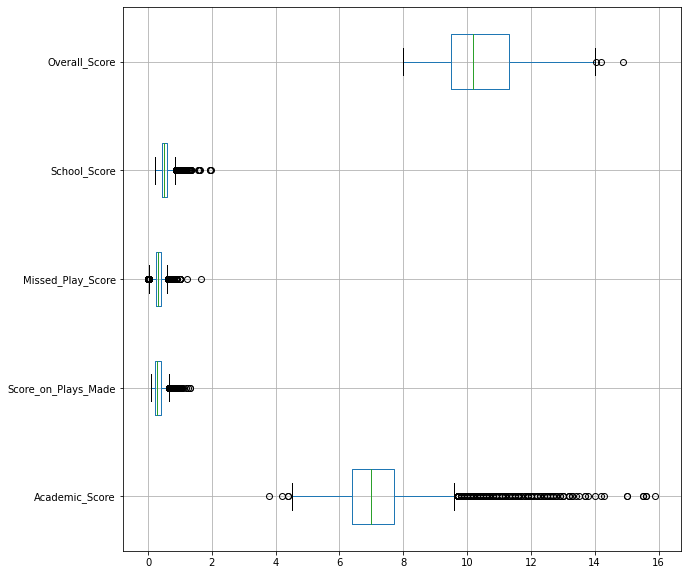

In [13]:
# construct box plot for continuous variables (before outliers treatment)
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

We have `outliers` in the dataset. let's __not treat the outliers at this point in time__ in this dataset.

### Check the Measures of Dispersion:

### Target Variable Analysis ("Scholarship")

In [17]:
df['Scholarship'].value_counts()

Partial    4028
Full       2187
Name: Scholarship, dtype: int64

In [18]:
# Ratio
counts = df['Scholarship'].value_counts(normalize=True)
counts

Partial    0.648109
Full       0.351891
Name: Scholarship, dtype: float64

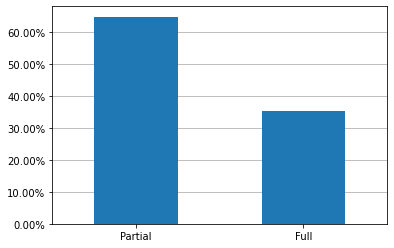

In [19]:
import matplotlib.pyplot as pyp
fig = pyp.figure()
ax = fig.add_subplot(111)

counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
pyp.show()

__Insight2:__ 

- Out of total. there are __4028(~64%) candidates__ who have won __Partial Scholarship__ and 2187(~35%) candidates have won full scholarship._

__Insight3:__ 

In __"football scholarship"__ dataset, while doing EDA we found:

- There are __9 variables (5 numerical and 4 categorical)__ in the dataset with total __6215 records__
- __947 records__ found duplicate but considering the application of the dataset and we dont have unique identifier (i.e. student id). Hence, we are __not removing the same__ from the dataset.
- There is __NO missing values__ in the dataset.
- We could see the __right skewwed data__ in all 5 numercial variables.
     1. Academic_Score        -  __1.75__
     2. Score_on_Plays_Made   -  __1.41__
     3. Missed_Play_Score     -  __0.49__
     4. School_Score          -  __1.73__
     5. Overall_Score         -  __0.60__
- Further, We could see outliers in the dataset but __we have not treated the outliers at this point in time__.

### Now, Dataset is ready for next level of inferences

### Univariate Analysis (Numerical Variables)

Text(0.5, 1.0, 'Overall_Scoreboxplot')

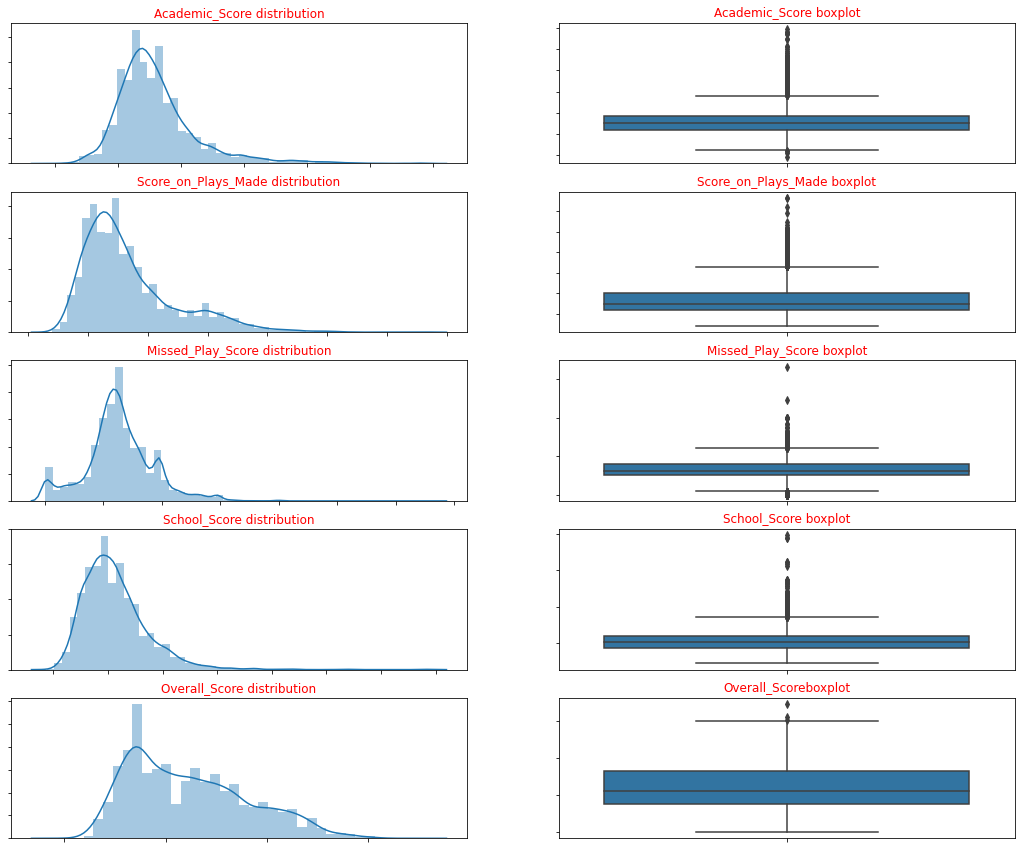

In [20]:
# histogram & boxplot for 5 numerical variables

fig,axes =  plt.subplots(5,2)
fig.set_size_inches(18,15)

x1 = df['Academic_Score']

a = sns.distplot(x1, ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Academic_Score distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x1, ax = axes[0][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Academic_Score boxplot',fontsize = 12,color = 'red')

x2 = df['Score_on_Plays_Made']

a = sns.distplot(x2, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Score_on_Plays_Made distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x2, ax = axes[1][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Score_on_Plays_Made boxplot',fontsize = 12,color = 'red')

x3 = df['Missed_Play_Score']

a = sns.distplot(x3, ax = axes[2][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Missed_Play_Score distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x3, ax = axes[2][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Missed_Play_Score boxplot',fontsize = 12,color = 'red')

x4 = df['School_Score']

a = sns.distplot(x4, ax = axes[3][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('School_Score distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x4, ax = axes[3][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('School_Score boxplot',fontsize = 12,color = 'red')

x5 = df['Overall_Score']

a = sns.distplot(x5, ax = axes[4][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Overall_Score distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x5, ax = axes[4][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('Overall_Scoreboxplot',fontsize = 12,color = 'red')

__Insight4:__ 

In Univariate analysis(numerical variables), we have used __distribution plot and box plot__ and found:

- For __all the variables data are not normally distributed__
- All __five variables__ had __outliers__ in the dataset.

### Univariate Analysis (Categorical Variables)

#### Check the data types of all the variables and get the unique counts of all the 'Object' type variables

In [21]:
# categorical variables details
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Injury_Propensity
Low         2650
Normal      1319
High        1181
Moderate    1065
Name: Injury_Propensity, dtype: int64


School_Type
C    3384
B    1620
D    1211
Name: School_Type, dtype: int64


Region
Eastern     2835
Western     1724
Southern    1656
Name: Region, dtype: int64


Scholarship
Partial    4028
Full       2187
Name: Scholarship, dtype: int64




Text(0.5, 1.0, 'Scholarship countplot')

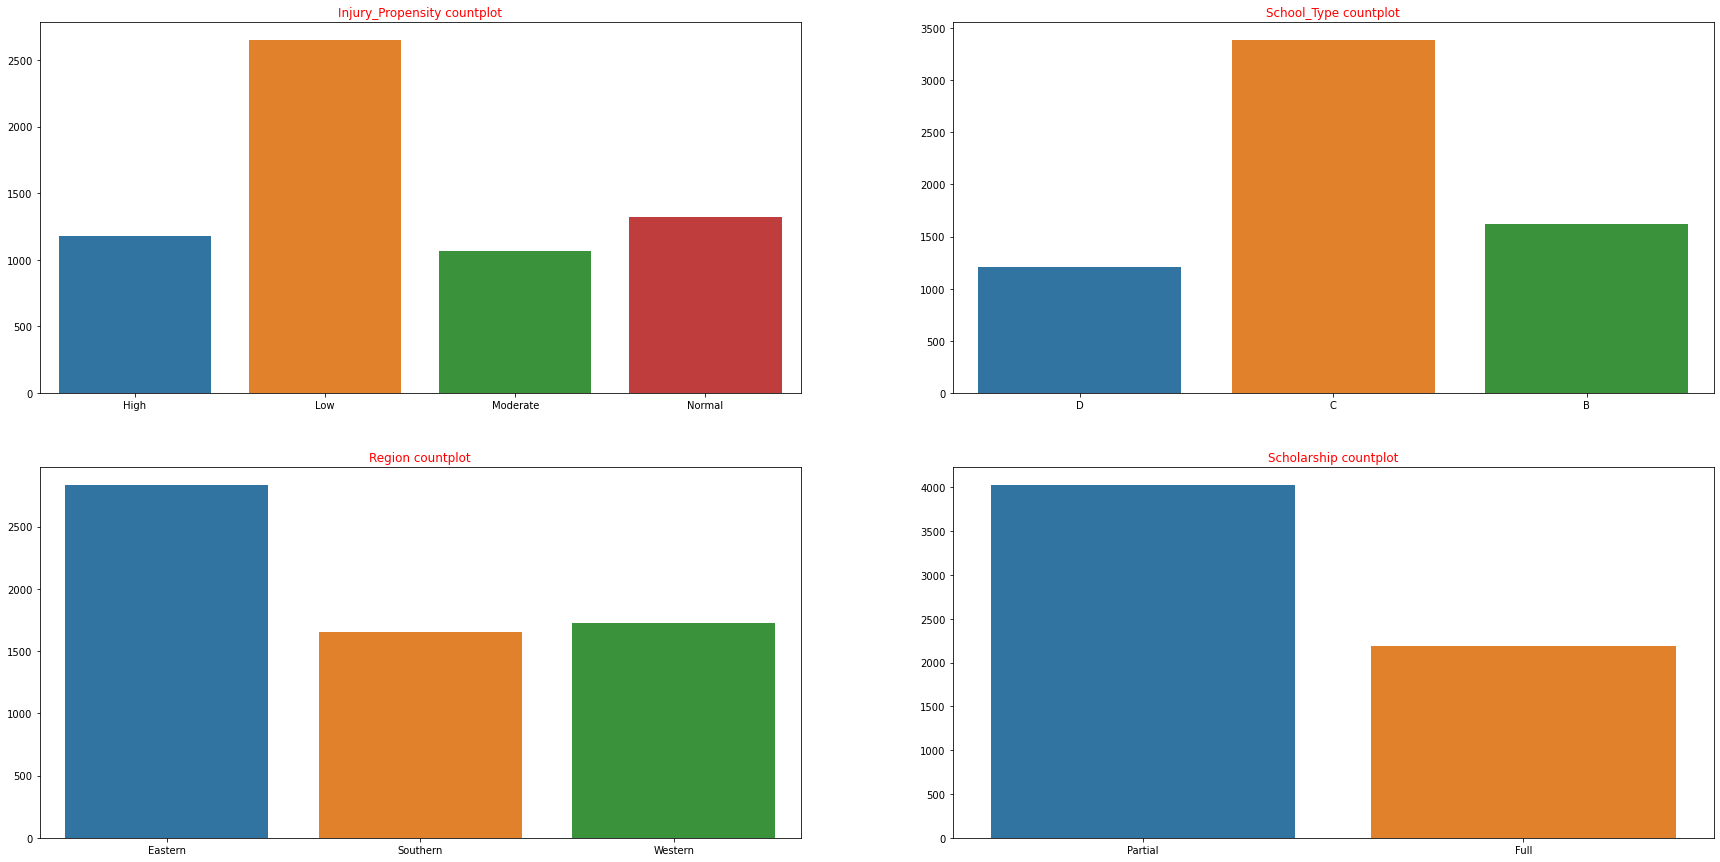

In [22]:
# countplot for 3 categorical variables

fig,axes =  plt.subplots(2,2)
fig.set_size_inches(30,15)

x1 = df['Injury_Propensity']

a = sns.countplot(x1, ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Injury_Propensity countplot',fontsize = 12, color = 'red')

x2 = df['School_Type']

a = sns.countplot(x2, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('School_Type countplot',fontsize = 12, color = 'red')

x3 = df['Region']

a = sns.countplot(x3, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Region countplot',fontsize = 12, color = 'red')

x4 = df['Scholarship']

a = sns.countplot(x4, ax = axes[1][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Scholarship countplot',fontsize = 12, color = 'red')

__Insight5:__ 

In Univariate analysis(categorial variables), we have used __count plot__ and found:

- __Injury Propensity: Low__ has the highest count followed by _normal, high and moderate_.
- __School Type: C__ has the highest count followed by _B,and D_.
- __Region: Eastern__ has higher contribution followed by _Western and Southern_.
- __Scholarship: Partial__ has higher contribution followed by _full_.

### Bivariate Analysis (Numerical variables vs Numerical variables)

In [23]:
# Covariance

df.cov() # Prints the covariance of each attribute against every other attribute

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
Academic_Score,1.669876,0.046674,0.061020,0.058422,-0.116703
Score_on_Plays_Made,0.046674,0.025639,-0.008548,0.005599,-0.007660
Missed_Play_Score,0.061020,-0.008548,0.021069,0.001106,-0.002243
School_Score,0.058422,0.005599,0.001106,0.021681,0.000600
Overall_Score,-0.116703,-0.007660,-0.002243,0.000600,1.374766


In [24]:
# correlation

cor = df.corr()  # prints the correlation coefficient between every pair of attributes
cor

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
Academic_Score,1.000000,0.225572,0.325317,0.307041,-0.077024
Score_on_Plays_Made,0.225572,1.000000,-0.367801,0.237480,-0.040800
Missed_Play_Score,0.325317,-0.367801,1.000000,0.051730,-0.013180
School_Score,0.307041,0.237480,0.051730,1.000000,0.003476
Overall_Score,-0.077024,-0.040800,-0.013180,0.003476,1.000000


For Numeric vs Numeric Scatter plot and heat map are the options to go with

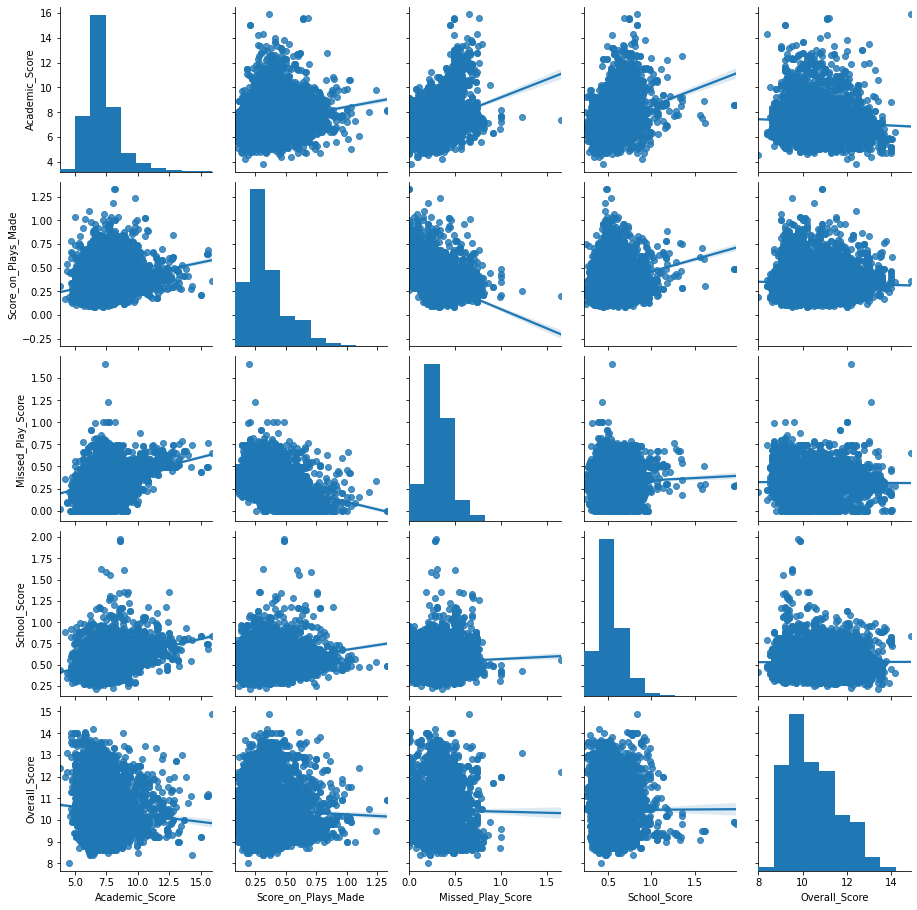

In [25]:
# scatter plot
sns.pairplot(df,kind='reg')

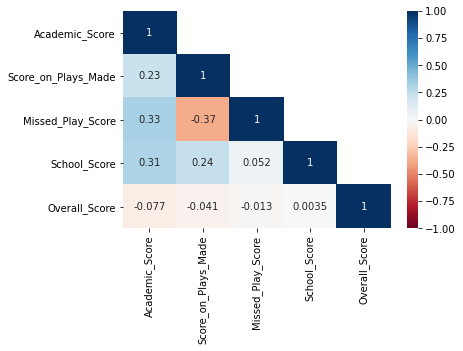

In [26]:
# Heatmap view
sns.heatmap(df[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score'
                ,'Overall_Score']].corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',
            mask=np.triu(df[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score'
                ,'Overall_Score']].corr(),+1))

In [27]:
#Highly correlated variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:15]
so.round(2)

Missed_Play_Score    Score_on_Plays_Made    0.37
Score_on_Plays_Made  Missed_Play_Score      0.37
Missed_Play_Score    Academic_Score         0.33
Academic_Score       Missed_Play_Score      0.33
                     School_Score           0.31
School_Score         Academic_Score         0.31
                     Score_on_Plays_Made    0.24
Score_on_Plays_Made  School_Score           0.24
                     Academic_Score         0.23
Academic_Score       Score_on_Plays_Made    0.23
                     Overall_Score          0.08
Overall_Score        Academic_Score         0.08
Missed_Play_Score    School_Score           0.05
School_Score         Missed_Play_Score      0.05
Score_on_Plays_Made  Overall_Score          0.04
dtype: float64

__Insight6:__ 

In Bivariate analysis(Numerical variables), we have used __scatter plot & heatmap__ and found:

- In scatter plot and heat map both stats that __none of the variables shows the strong relationship__.

### Bivariate Analysis

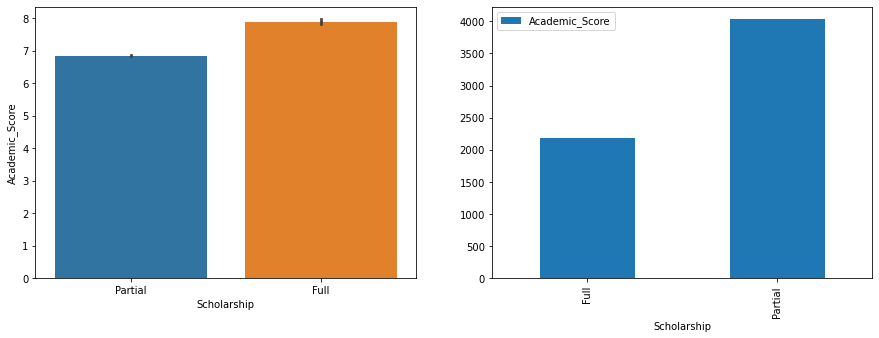

In [28]:
# Average Academic_Score AND No. of the students with full and partial scholarship

fig, axes = pyp.subplots(1, 2, sharey = False) 
#one row, 2 columns
# sharey (means share Y axis) = True when in all the plots Y axis is the same so u dont need to write the name of field on Y axis against each plot. It will appear only against the first plot on the extreme left.
sns.barplot(data = df, x = 'Scholarship', y = 'Academic_Score', ax = axes[0]);
df.groupby(by=['Scholarship'])['Academic_Score'].count().reset_index().sort_values(['Academic_Score']).tail(10).plot(x='Scholarship',y='Academic_Score',kind='bar', figsize=(15,5), ax = axes[1])
pyp.show()

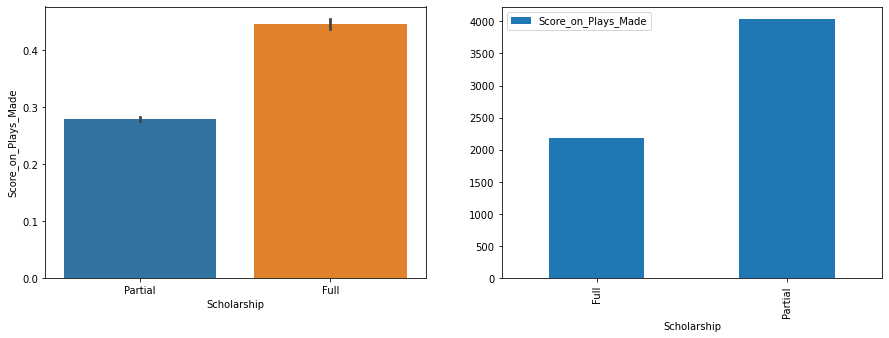

In [29]:
# Average Score_on_Plays_Made AND No. of the students with full and partial scholarship

fig, axes = pyp.subplots(1, 2, sharey = False) 
#one row, 2 columns
# sharey (means share Y axis) = True when in all the plots Y axis is the same so u dont need to write the name of field on Y axis against each plot. It will appear only against the first plot on the extreme left.
sns.barplot(data = df, x = 'Scholarship', y = 'Score_on_Plays_Made', ax = axes[0]);
df.groupby(by=['Scholarship'])['Score_on_Plays_Made'].count().reset_index().sort_values(['Score_on_Plays_Made']).tail(10).plot(x='Scholarship',y='Score_on_Plays_Made',kind='bar', figsize=(15,5), ax = axes[1])
pyp.show()

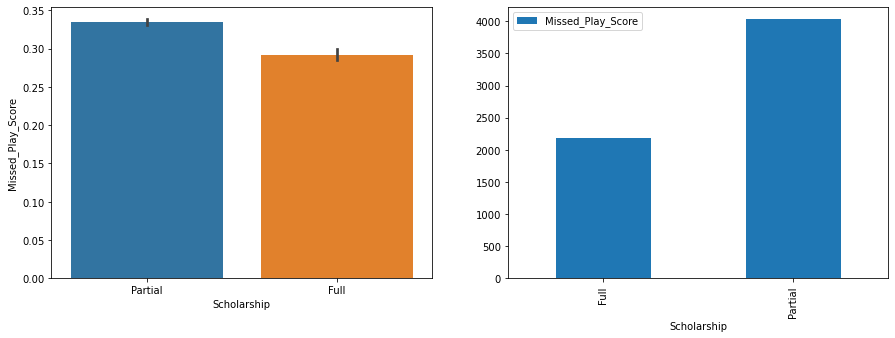

In [30]:
# Average Missed_Play_Score AND No. of the students with full and partial scholarship

fig, axes = pyp.subplots(1, 2, sharey = False) 
sns.barplot(data = df, x = 'Scholarship', y = 'Missed_Play_Score', ax = axes[0]);
df.groupby(by=['Scholarship'])['Missed_Play_Score'].count().reset_index().sort_values(['Missed_Play_Score']).tail(10).plot(x='Scholarship',y='Missed_Play_Score',kind='bar', figsize=(15,5), ax = axes[1])
pyp.show()

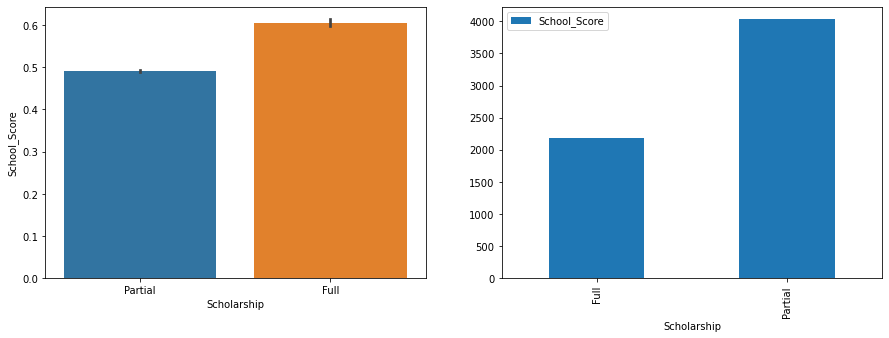

In [31]:
# Average School_Score AND No. of the students with full and partial scholarship

fig, axes = pyp.subplots(1, 2, sharey = False) 
sns.barplot(data = df, x = 'Scholarship', y = 'School_Score', ax = axes[0]);
df.groupby(by=['Scholarship'])['School_Score'].count().reset_index().sort_values(['School_Score']).tail(10).plot(x='Scholarship',y='School_Score',kind='bar', figsize=(15,5), ax = axes[1])
pyp.show()

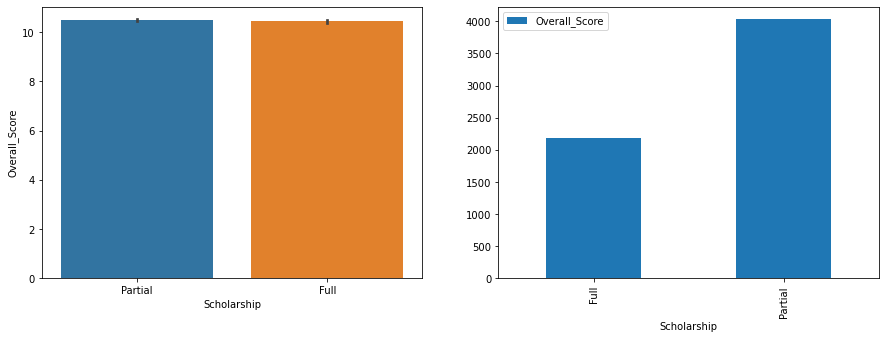

In [32]:
# Average Overall_Score AND No. of the students with full and partial scholarship

fig, axes = pyp.subplots(1, 2, sharey = False) 
sns.barplot(data = df, x = 'Scholarship', y = 'Overall_Score', ax = axes[0]);
df.groupby(by=['Scholarship'])['Overall_Score'].count().reset_index().sort_values(['Overall_Score']).tail(10).plot(x='Scholarship',y='Overall_Score',kind='bar', figsize=(15,5), ax = axes[1])
pyp.show()

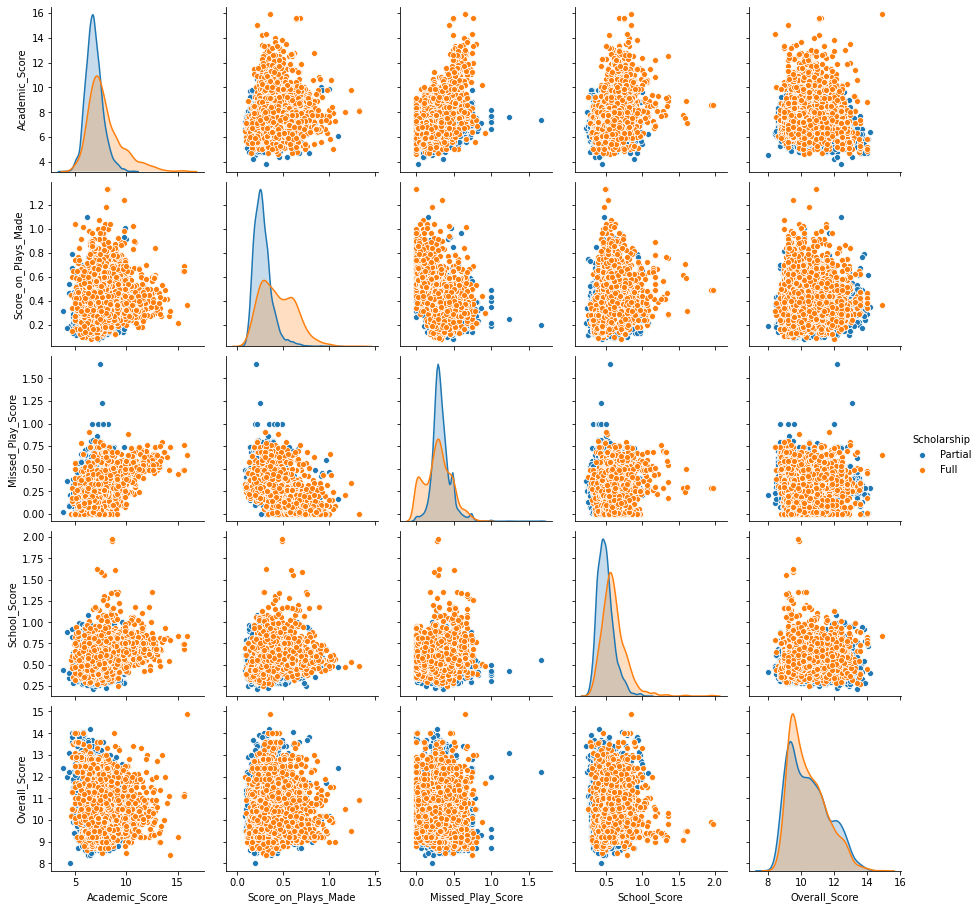

In [33]:
# Pairplot for relationship of each variabe with SCHOLARSHIP

sns.pairplot(df, hue = 'Scholarship')


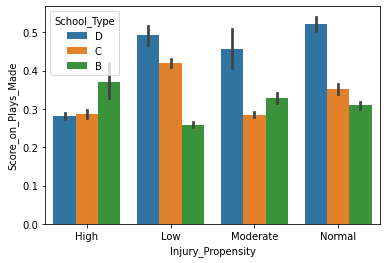

In [34]:
sns.barplot(data = df, x = 'Injury_Propensity', y = 'Score_on_Plays_Made', hue = 'School_Type');

Text(0.5, 1.0, 'Scholarship to Score on Plays Made')

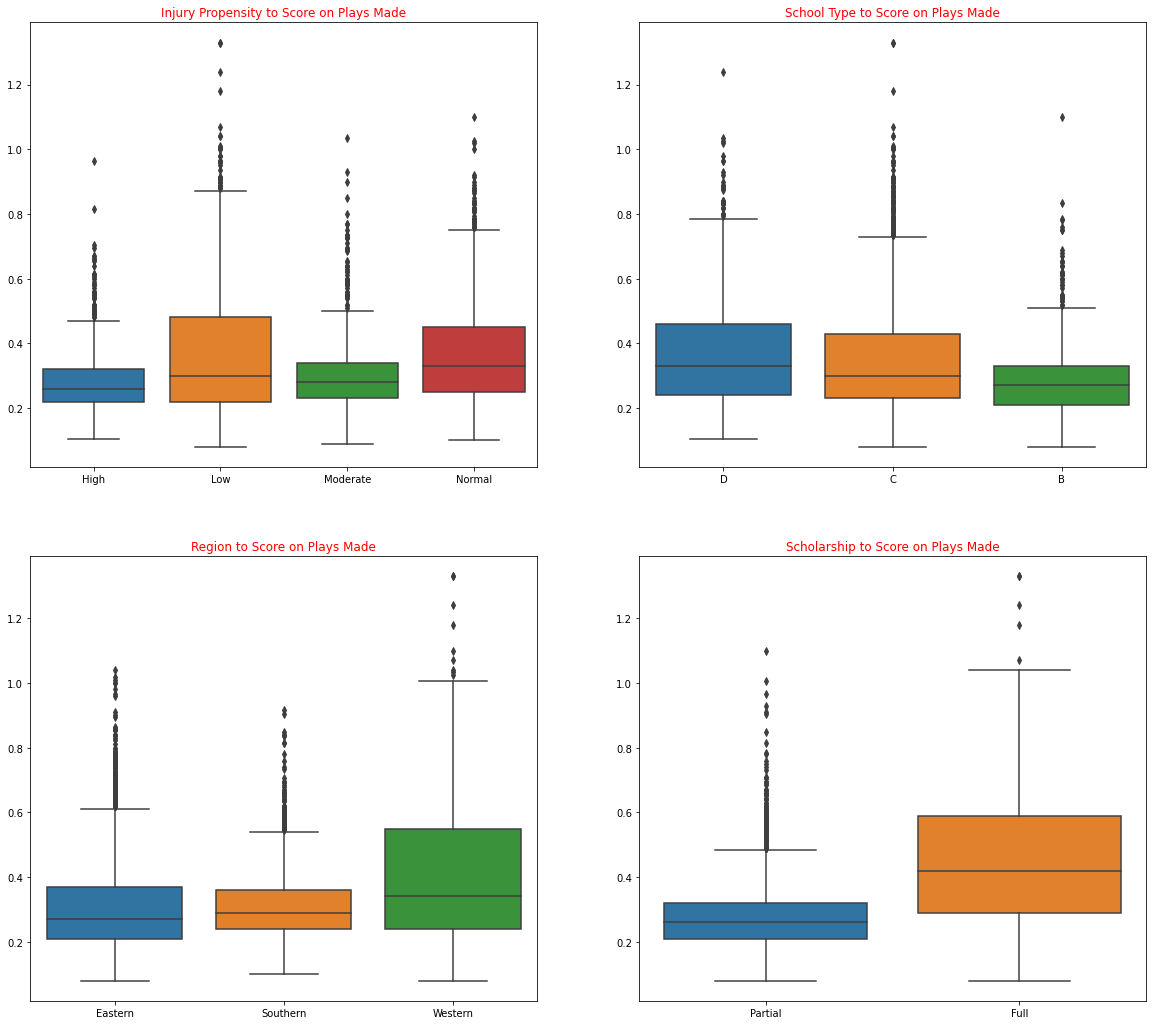

In [35]:
# boxplot for all categorical & numercial variables as "Score_on_Plays_Made"

fig,axes =  pyp.subplots(2,2)
fig.set_size_inches(20,18)

y = df['Score_on_Plays_Made']
x1 = df['Injury_Propensity']

a = sns.boxplot(x=x1, y=y,ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Injury Propensity to Score on Plays Made',fontsize = 12, color = 'red')

x2 = df['School_Type']

a = sns.boxplot(x=x2, y=y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('School Type to Score on Plays Made',fontsize = 12, color = 'red')

x3 = df['Region']

a = sns.boxplot(x=x3, y=y, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Region to Score on Plays Made',fontsize = 12, color = 'red')

x4 = df['Scholarship']

a = sns.boxplot(x=x4, y=y,ax = axes[1][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Scholarship to Score on Plays Made',fontsize = 12, color = 'red')

__Insight7:__ 

In Bivariate analysis(Categorical vs Numerical variables), we have compared __all categorical variables with Score on Plays Made__.Find below the detailed analysis:

- __Median of Score on Play Made across all the categories of Injury Propensity__ are __different__. Further, _it is noted that __LOW__ category has the highest Score on Play Made._
- __Median of Score on Play Made across all the school types are different. School type 'C'__ has the highest Score on Play Made compared to the other school types._
- __Median of Score on Play Made is different for all the Regions__. The Score on Play Made is found to be the highest for Western Region which is followed by the Eastern and Southern Region.
- __Median of Score on Play Made is different for both Full and Partial Scholarship won students__.Score on Play Made is highest for students who have won __Full Scholarship__.

Text(0.5, 1.0, 'Scholarship to Missed Play Score')

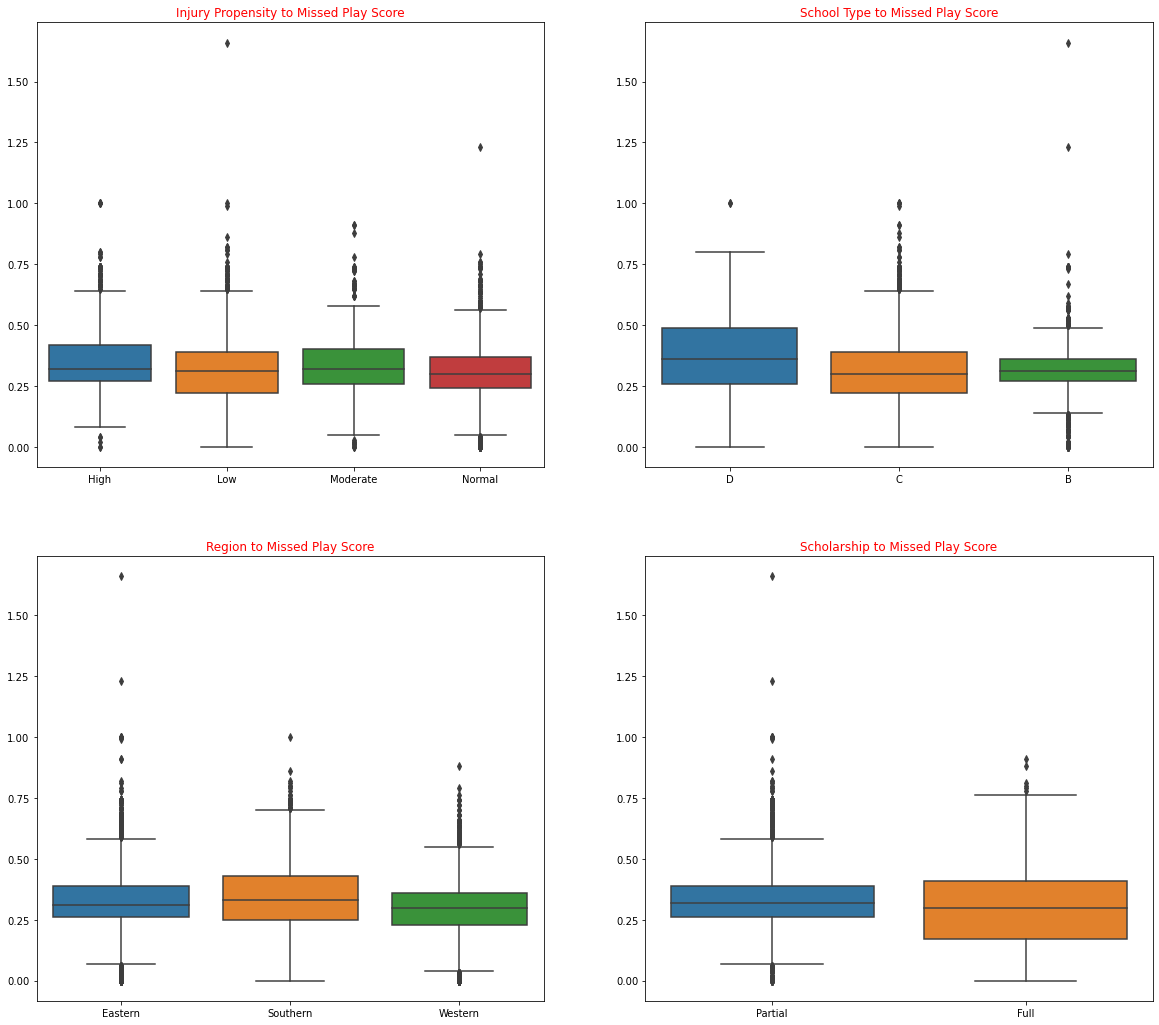

In [36]:
# boxplot for all categorical & numercial variables as "Missed_Play_Score"

fig,axes =  pyp.subplots(2,2)
fig.set_size_inches(20,18)

y = df['Missed_Play_Score']
x1 = df['Injury_Propensity']

a = sns.boxplot(x=x1, y=y,ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Injury Propensity to Missed Play Score',fontsize = 12, color = 'red')

x2 = df['School_Type']

a = sns.boxplot(x=x2, y=y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('School Type to Missed Play Score',fontsize = 12, color = 'red')

x3 = df['Region']

a = sns.boxplot(x=x3, y=y, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Region to Missed Play Score',fontsize = 12, color = 'red')

x4 = df['Scholarship']

a = sns.boxplot(x=x4, y=y,ax = axes[1][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Scholarship to Missed Play Score',fontsize = 12, color = 'red')

__Insight8:__ 

In Bivariate analysis(Categorical vs Numerical variables), we have compared __all categorical variables with Missed Play Score__.Find below the detailed analysis:

- __Median of Missed Play Score across all the categories of Injury Propensity__ is the __same__. Further, _it is also noted that __LOW__ category has similar scores._
- __Median of Missed Play Score is similar for school type C and B but different for school type D. School type 'B'__ has the highest Missed Play Score compared to the other school types._
- __Median of Missed Play Score has minimal difference across all the Regions__. The Missed Play Score is found to be the highest for Eastern Region which is followed by the Southern and Western Region.
- __Median of Missed Play Score is different for both Full and Partial Scholarship won students__.issed Play Score is highest for students who have won __Partial Scholarship__.

Text(0.5, 1.0, 'Scholarship to School Score')

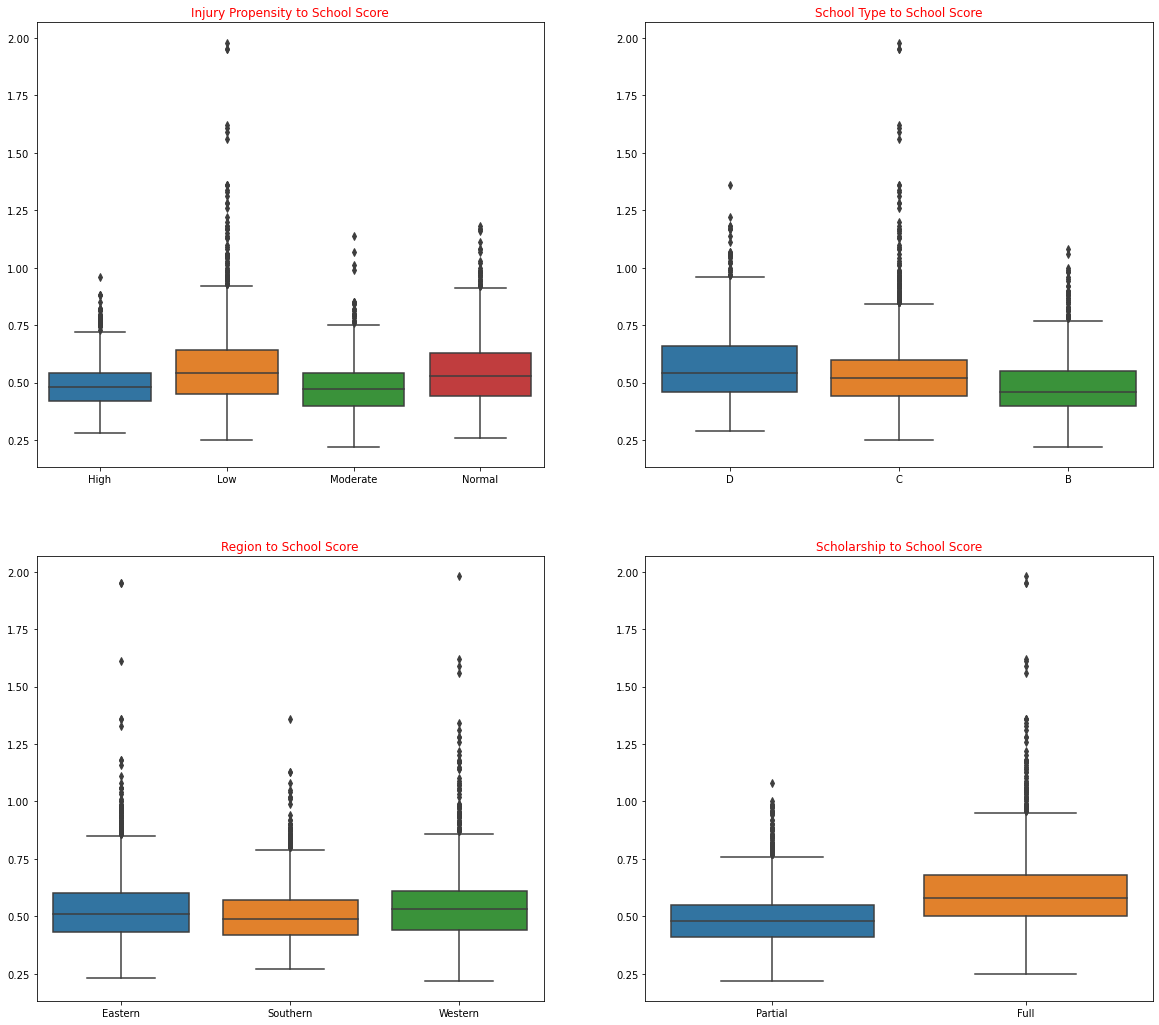

In [37]:
# boxplot for all categorical & numercial variables as "School_Score"

fig,axes =  pyp.subplots(2,2)
fig.set_size_inches(20,18)

y = df['School_Score']
x1 = df['Injury_Propensity']

a = sns.boxplot(x=x1, y=y,ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Injury Propensity to School Score',fontsize = 12, color = 'red')

x2 = df['School_Type']

a = sns.boxplot(x=x2, y=y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('School Type to School Score',fontsize = 12, color = 'red')

x3 = df['Region']

a = sns.boxplot(x=x3, y=y, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Region to School Score',fontsize = 12, color = 'red')

x4 = df['Scholarship']

a = sns.boxplot(x=x4, y=y,ax = axes[1][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Scholarship to School Score',fontsize = 12, color = 'red')

__Insight9:__ 

In Bivariate analysis(Categorical vs Numerical variables), we have compared __all categorical variables with School Score__.Find below the detailed analysis:

- __Median of School Score across all the categories of Injury Propensity__ is __different__. Further, _it is also noted that __LOW__ category has the highest School Scores._
- __Median of School Score is different across all school types. School type 'C'__ has the highest School Score compared to the other school types.
- __Median of School Score has minimal difference__ across all the Regions. The School Score is found to be the highest for Western Region which is followed by the Eastern and Southern Region.
- __Median of School Score is different for both Full and Partial Scholarship won students.__ School Score is highest for students who have won __Full Scholarship__.

Text(0.5, 1.0, 'Scholarship to Overall Score')

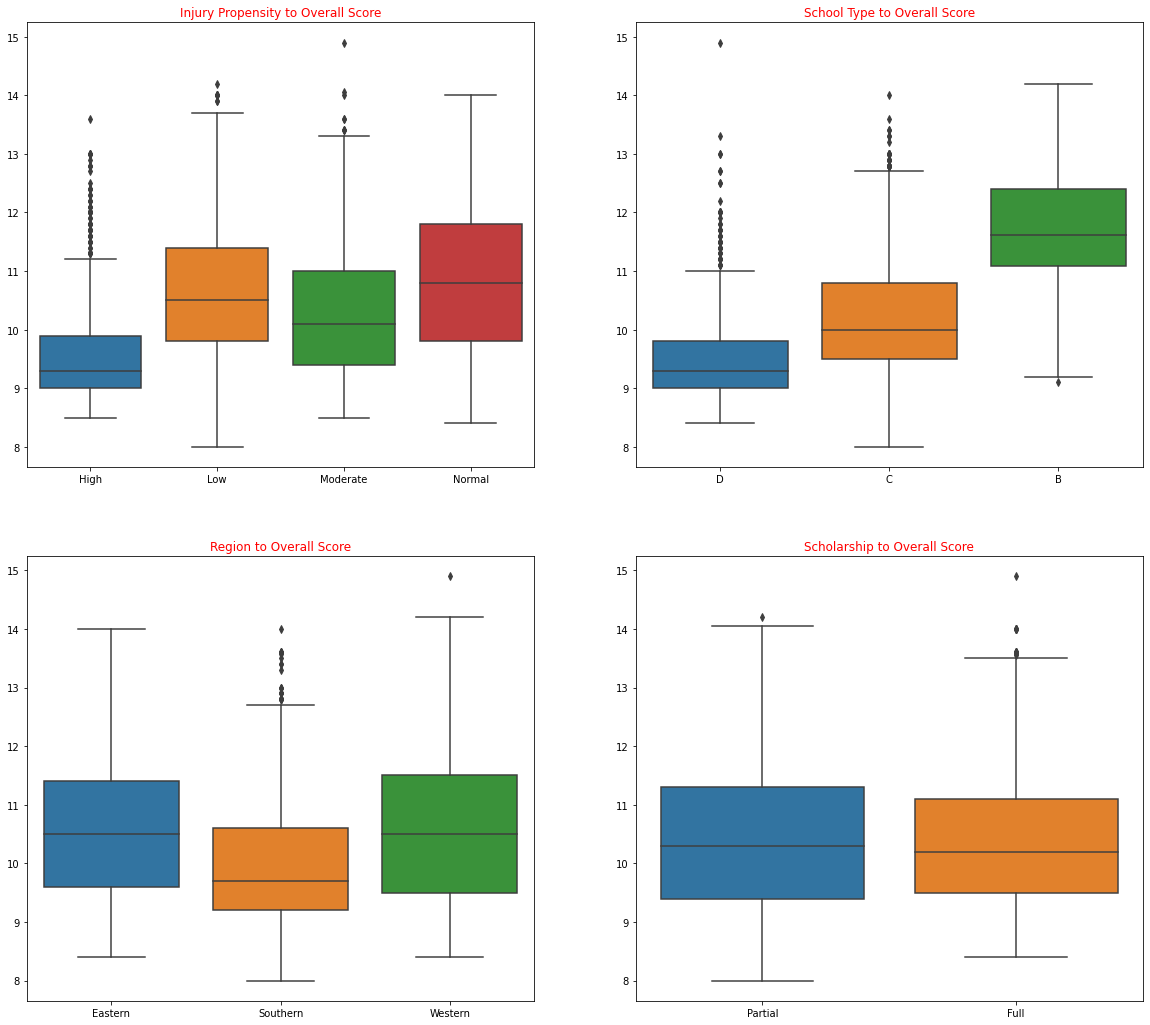

In [38]:
# boxplot for all categorical & numercial variables as "Overall_Score"

fig,axes =  pyp.subplots(2,2)
fig.set_size_inches(20,18)

y = df['Overall_Score']
x1 = df['Injury_Propensity']

a = sns.boxplot(x=x1, y=y,ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Injury Propensity to Overall Score',fontsize = 12, color = 'red')

x2 = df['School_Type']

a = sns.boxplot(x=x2, y=y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('School Type to Overall Score',fontsize = 12, color = 'red')

x3 = df['Region']

a = sns.boxplot(x=x3, y=y, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Region to Overall Score',fontsize = 12, color = 'red')

x4 = df['Scholarship']

a = sns.boxplot(x=x4, y=y,ax = axes[1][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('Scholarship to Overall Score',fontsize = 12, color = 'red')

__Insight10 :__ 

In Bivariate analysis(Categorical vs Numerical variables), we have compared __all categorical variables with Overall Score__.Find below the detailed analysis:

- __Median of Overall Score across all the categories of Injury Propensity__ is __different__. Further, _it is also noted that __Moderate__ category has the highest Overall Scores._
- __Median of Overall Score is different across all school types. School type 'D'__ has the highest Overall Score compared to the other school types.
- __Median of Overall Score is different across all the Regions__. The Overall Score is found to be the highest for Western Region.
- __Median of Overall Score is different for both Full and Partial Scholarship won students__.Overall Score is highest for students who have won __Full Scholarship__.

## ------------------------     Question1 : EDA (Exploratory Data Analysis) ENDS ---------------------------

## Question2:

## Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.
    

__Objective:__
    
Use __Full Data__ to develop a __logistic regression model__ to __identify significant predictors__. 

Check whether the proposed model is __free of multicollinearity__. Apply variable selection method as required. Show __all intermediate models leading to the final model__. 

Justify your choice of the final model. Which are __the significant predictors?__


For easier interpretation of the models, later on, it may be better to code __Full = 1 and Partial = 0__. You may assume the opposite, but then you have to be very careful about the interpretation of the logistic model coefficients later.

### Treat the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.

In [39]:
df.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,D,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial


In [40]:
# We are coding up the 'Injury_Propensity' variable in an ordinal manner

df['Injury_Propensity'] = np.where(df['Injury_Propensity'] =='Low', '1', df['Injury_Propensity'])
df['Injury_Propensity'] = np.where(df['Injury_Propensity'] =='Normal', '2', df['Injury_Propensity'])
df['Injury_Propensity'] = np.where(df['Injury_Propensity'] =='Moderate', '3', df['Injury_Propensity'])
df['Injury_Propensity'] = np.where(df['Injury_Propensity'] =='High', '4', df['Injury_Propensity'])

In [41]:
# We are coding up the 'Scholarship' variable based on the our class of interest. 
# Hence, consider full scholarship as "1" and partial scholarship as "0"

df['Scholarship'] = np.where(df['Scholarship'] =='Partial', '0', df['Scholarship'])
df['Scholarship'] = np.where(df['Scholarship'] =='Full', '1', df['Scholarship'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   object 
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   object 
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


In [43]:
## Converting the 'Injury_Propensity'  & 'Scholarship' to numeric

df['Injury_Propensity'] = df['Injury_Propensity'].astype('int64')
df['Scholarship'] = df['Scholarship'].astype('int64')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   int64  
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 437.1+ KB


In [45]:
df.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,4,D,0.45,8.8,Eastern,0
1,6.3,0.30,0.34,1,C,0.49,9.5,Eastern,0


In [46]:
# Converting the other 'object' type variables as dummy variables

df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.27,0.36,4,0.45,8.8,0,0,1,0,0
1,6.3,0.30,0.34,1,0.49,9.5,0,1,0,0,0


In [47]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   int64  
 4   School_Score         6215 non-null   float64
 5   Overall_Score        6215 non-null   float64
 6   Scholarship          6215 non-null   int64  
 7   School_Type_C        6215 non-null   uint8  
 8   School_Type_D        6215 non-null   uint8  
 9   Region_Southern      6215 non-null   uint8  
 10  Region_Western       6215 non-null   uint8  
dtypes: float64(5), int64(2), uint8(4)
memory usage: 364.3 KB


In [48]:
df_dummy.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_C', 'School_Type_D', 'Region_Southern', 'Region_Western'],
      dtype='object')

In [49]:
# create copy of df_dummy dataset
df_final = df_dummy.copy()

#### MODEL 1

In [50]:
model_1 = 'Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern+Region_Western'

In [51]:
import statsmodels.formula.api as sm

In [52]:
Logistic_1 = sm.logit(formula=model_1,data=df_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.412189
         Iterations 7


In [53]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6204
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Apr 2021   Pseudo R-squ.:                  0.3645
Time:                        14:36:16   Log-Likelihood:                -2561.8
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.9368      0.536    -16.677      0.000      -9.987      -7.886
Academic_Score          0.4449      0.039     11.268      0.000       0.368       0.522
Score_on_Plays_Made     5.2091      0.296     17.573      0.000       4.628       5.790
Missed_Play_Score      -1.5331      0.315     -4.872      0.000      -2.150      -0.916
Injury_Propensity      -0.6080      0.042    -14.525      0.000      -0.690      -0.526
School_Score            2.9063      0.281     10.333      0.000       2.355       3.458
Overall_Score           0.2283      0.043      5.312      0.000       0.144       0.313
School_Type_C           1.3720      0.121     11.343      0.000       1.135       1.609
School_Type_D           2.2691      0.199     11.401      0.000       1.879       2.659
Region_Southern        -0.4410      0.088     -5.009      0.000      -0.614      -0.268
Region_Western          0.0400      0.088      0.456      0.648      -0.132       0.212
=======================================================================================
"""

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [54]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [55]:
vif_cal(input_data=df_dummy.drop('Scholarship',axis=1))

Academic_Score  VIF =  1.79
Score_on_Plays_Made  VIF =  1.55
Missed_Play_Score  VIF =  1.51
Injury_Propensity  VIF =  1.83
School_Score  VIF =  1.26
Overall_Score  VIF =  2.02
School_Type_C  VIF =  2.98
School_Type_D  VIF =  4.52
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.25


__Insight (MODEL 1):__

p-value of __`Region_Western`__ seems to be higher than the significance value of 0.05, hence __dropping the same__ as it is insignificant in presence of other variables.

#### MODEL 2

In [56]:
model_2 = 'Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern'

In [57]:
Logistic_2 = sm.logit(formula=model_2,data=df_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.412205
         Iterations 7


In [58]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6205
Method:                           MLE   Df Model:                            9
Date:                Fri, 16 Apr 2021   Pseudo R-squ.:                  0.3645
Time:                        14:36:17   Log-Likelihood:                -2561.9
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.9238      0.535    -16.674      0.000      -9.973      -7.875
Academic_Score          0.4454      0.039     11.281      0.000       0.368       0.523
Score_on_Plays_Made     5.2320      0.292     17.909      0.000       4.659       5.805
Missed_Play_Score      -1.5369      0.314     -4.888      0.000      -2.153      -0.921
Injury_Propensity      -0.6094      0.042    -14.597      0.000      -0.691      -0.528
School_Score            2.9067      0.281     10.334      0.000       2.355       3.458
Overall_Score           0.2281      0.043      5.306      0.000       0.144       0.312
School_Type_C           1.3675      0.121     11.343      0.000       1.131       1.604
School_Type_D           2.2674      0.199     11.397      0.000       1.877       2.657
Region_Southern        -0.4552      0.082     -5.528      0.000      -0.617      -0.294
=======================================================================================
"""

In [59]:
vif_cal(input_data=df_dummy.drop(['Scholarship','Region_Western'],axis=1))

Academic_Score  VIF =  1.79
Score_on_Plays_Made  VIF =  1.5
Missed_Play_Score  VIF =  1.51
Injury_Propensity  VIF =  1.83
School_Score  VIF =  1.26
Overall_Score  VIF =  2.02
School_Type_C  VIF =  2.96
School_Type_D  VIF =  4.52
Region_Southern  VIF =  1.09


__Insight (MODEL 2):__

Dropping __`School_Type_D`__ because of high VIF value. (shows that _School_Type_D_ has high multicollinearity.)

#### MODEL 3

In [60]:
model_3 = 'Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+Region_Southern'

In [61]:
Logistic_3 = sm.logit(formula=model_3,data=df_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.423189
         Iterations 7


In [62]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6206
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 Apr 2021   Pseudo R-squ.:                  0.3475
Time:                        14:36:18   Log-Likelihood:                -2630.1
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.2733      0.499    -14.573      0.000      -8.252      -6.295
Academic_Score          0.6173      0.036     17.120      0.000       0.547       0.688
Score_on_Plays_Made     5.9004      0.287     20.589      0.000       5.339       6.462
Missed_Play_Score      -1.4594      0.312     -4.678      0.000      -2.071      -0.848
Injury_Propensity      -0.3577      0.034    -10.517      0.000      -0.424      -0.291
School_Score            3.8427      0.269     14.287      0.000       3.316       4.370
Overall_Score          -0.0744      0.033     -2.229      0.026      -0.140      -0.009
School_Type_C           0.3282      0.075      4.365      0.000       0.181       0.476
Region_Southern        -0.4672      0.081     -5.751      0.000      -0.626      -0.308
=======================================================================================
"""

In [63]:
vif_cal(input_data=df_dummy.drop(['Scholarship','Region_Western','School_Type_D'],axis=1))

Academic_Score  VIF =  1.43
Score_on_Plays_Made  VIF =  1.43
Missed_Play_Score  VIF =  1.51
Injury_Propensity  VIF =  1.27
School_Score  VIF =  1.18
Overall_Score  VIF =  1.28
School_Type_C  VIF =  1.11
Region_Southern  VIF =  1.09


__Insight (MODEL 3):__

1. `Academic Score`, `Score on Plays made`, `Missed Play Score`, `Injury Propensity`, `School Score`, `Overall Score`, `School Type C`and `REgion Southern` are the significant variable to predict `Scholarship` variable.
2. *Mc.fadden __R-squared value__ for full data is* - __0.3475__
3. __*p-values*__ - p-values for all the coefficients seem to be __less than the significance level of 0.05.__ - meaning that all the predictors are statistically significant.

So, let's consider __MODEL 3__ as the __final model for full dataset__

### Accuracy Score & Predict the class

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

### MODEL 3: Score, Class predict & probability

In [66]:
model_3 = LR.fit(df_dummy[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']],df_dummy['Scholarship'])
model_3_score = model_3.score(df_dummy[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']],df_dummy['Scholarship'])
print('Accuracy Score of Model 3:',model_3_score)
model_3_class = model_3.predict(df_dummy[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']])
print('predict class of Model 3:',model_3_class)
model_3_prob = model_3.predict_proba(df_dummy[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']])
print('predict class probabilities of Model 3:', model_3_prob)

Accuracy Score of Model 3: 0.8503620273531778
predict class of Model 3: [0 0 0 ... 1 1 1]
predict class probabilities of Model 3: [[0.9038492  0.0961508 ]
 [0.72390277 0.27609723]
 [0.73309812 0.26690188]
 ...
 [0.17865599 0.82134401]
 [0.18708237 0.81291763]
 [0.12574284 0.87425716]]


### MODEL 3: Interpret Logistic Model

In [67]:
final_model = df_dummy[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']]

In [68]:
df=pd.DataFrame({'odds_ratio':(np.exp(model_3.coef_).T).tolist(),'Probability':(np.exp(model_3.coef_)/(1+np.exp(model_3.coef_))).T.tolist()  ,'variable':final_model.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,Probability,variable
1,365.182517,[0.9972691213999313],Score_on_Plays_Made
4,46.648977,[0.9790131906009052],School_Score
0,1.853994,[0.6496138816963952],Academic_Score
6,1.388417,[0.5813126913746783],School_Type_C
5,0.928265,[0.4813990539954299],Overall_Score
3,0.699302,[0.41152313286725567],Injury_Propensity
7,0.626728,[0.38526915080726054],Region_Southern
2,0.232381,[0.1885625286228554],Missed_Play_Score


### MODEL 3: Confusion Matrix

In [69]:
from sklearn import metrics
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

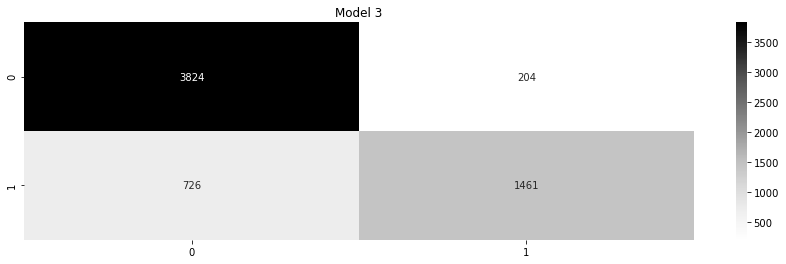

In [70]:
a = sns.heatmap((metrics.confusion_matrix(df_dummy['Scholarship'],model_3_class)),annot=True,fmt='.5g',cmap='Greys');
a.set_title('Model 3');

In [71]:
tn, fp, fn, tp = metrics.confusion_matrix(df_dummy['Scholarship'],model_3_class).ravel()
print('Model 3:')
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 3:
True Negative: 3824 
False Positives: 204 
False Negatives: 726 
True Positives: 1461


In [72]:
print('Model 3:')
print(metrics.classification_report(df_dummy['Scholarship'],model_3_class))

Model 3:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4028
           1       0.88      0.67      0.76      2187

    accuracy                           0.85      6215
   macro avg       0.86      0.81      0.83      6215
weighted avg       0.85      0.85      0.84      6215



### Custom cutoff set to maximise accuracy.

We will do this exercise only on the training data.

In [73]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(df_dummy['Scholarship'])):#defining a loop for the length of the test data
        if np.array(model_3_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(df_dummy['Scholarship'],custom_cutoff_data),3))
    print('F1 Score',round(metrics.f1_score(df_dummy['Scholarship'],custom_cutoff_data),3),'\n')

0.1 

Accuracy Score 0.493
F1 Score 0.556 

0.2 

Accuracy Score 0.681
F1 Score 0.637 

0.3 

Accuracy Score 0.781
F1 Score 0.704 

0.4 

Accuracy Score 0.831
F1 Score 0.747 

0.5 

Accuracy Score 0.85
F1 Score 0.759 

0.6 

Accuracy Score 0.851
F1 Score 0.747 

0.7 

Accuracy Score 0.839
F1 Score 0.712 

0.8 

Accuracy Score 0.812
F1 Score 0.64 

0.9 

Accuracy Score 0.748
F1 Score 0.445 



We see that __0.5 and 0.6__ gives __better accuracy__ than the rest of the custom cut-off values. But __0.5 cut-off gives us the best 'f1-score'__. Here, we will take the __cut-off as 0.5 (which is bydefault)__ to get the optimum 'f1' score. 

In [74]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [75]:
#save the classification report in dataset
m3_cm=classification_report(df_dummy['Scholarship'],model_3_class,output_dict=True)

#transpose the dataset
m3_cm_temp=pd.DataFrame(m3_cm).transpose()

#fetch the key metrics from the table
m3_f1=round(m3_cm_temp.loc["1"][2],2)
m3_recall=round(m3_cm_temp.loc["1"][1],2)
m3_precision=round(m3_cm_temp.loc["1"][0],2)

### MODEL 3 : AUC - ROC curve

Model 3 AUC: 0.82981


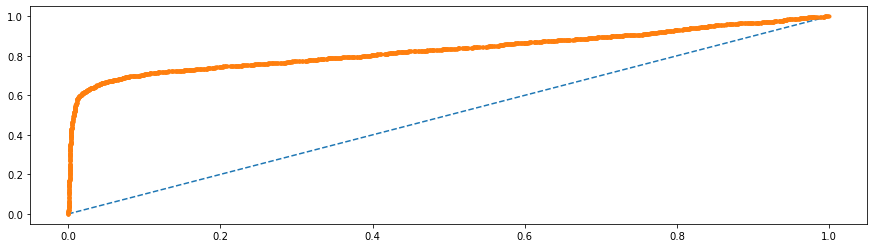

In [76]:
# AUC and ROC for the model 3

auc_m3 = metrics.roc_auc_score(df_dummy['Scholarship'],model_3_prob[:, 1])
print('Model 3 AUC: %.5f' % auc_m3)
fpr_m3, tpr_m3, thresholds_m3 = metrics.roc_curve(df_dummy['Scholarship'],model_3_prob[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_m3, tpr_m3, marker='.') 
plt.show()

In [77]:
pd.options.display.float_format = "{:,.4f}".format
comparison = pd.DataFrame({'Full Data' : [auc_m3,model_3_score,m3_recall,m3_precision,m3_f1]},
                           index = ['AUC', 'Accuracy', 'Recall','Precision','F1 Score'])
comparison

,Full Data
AUC,0.8298
Accuracy,0.8504
Recall,0.6700
Precision,0.8800
F1 Score,0.7600


__Final Insights for Question 2:__

1. `Region Western` has p-value more then 0.05 hence, we have dropped it from the dataset. 
2. Furhter, `School Type D` has highest VIF value which is more than 4 hence, we have dropped it from the dataset.
3. So, finally `Academic Score`, `Score on Plays made`, `Missed Play Score`, `Injury Propensity`, `School Score`, `Overall Score`, `School Type C`and `Region Southern` are __the significant variable to predict `Scholarship` variable__ and are __free of multicollinearity__. 
4. *Mc.fadden __R-squared value__ for full data is* - __0.3475__
5. __*p-values*__ - p-values for all the coefficients seem to be __less than the significance level of 0.05.__ - meaning that __above predictors are statistically significant__.
6. Further, we have checked the custom cut-off to see if we could increase the accuracy and f1-score and found, __0.5 and 0.6__ gives __better accuracy__ than the rest of the custom cut-off values. But __0.5 cut-off gives us the best 'f1-score'__. Here, we will take the __cut-off as 0.5 (which is bydefault)__ to get the optimum 'f1' score.
7. Evaluation Metrics:

    - AUC Score :  __82.98%__ 
    - Accuracy  :  __85.04%__
    - Recall    :  __67%__
    - Precision :  __88%__ 
    - F1-score  :  __76%__

## ------------------------     Question2 : Logistic Regression FULL DATA ENDS ---------------------------

## Question3:

## Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.
    

__Objective:__
    
If prediction accuracy of the __full scholarship is the only objective__, then you may want to divide the data into a __training and a test set, chosen randomly, and use the training set to develop a model__ and __test set to validate your model__. 

Use the __models developed in Part (II)__ to compare accuracy in __training and test sets__. 

Compare the __final model of Part (II) and the proposed one in Part (III)__. 

Which model provides the most accurate prediction? If the model found in __Part (II) is different from the proposed model in Part (III), give an explanation__.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
df_dummy.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0000,0.2700,0.3600,4,0.4500,8.8000,0,0,1,0,0
1,6.3000,0.3000,0.3400,1,0.4900,9.5000,0,1,0,0,0


### Train & Test split

In [80]:
# train and test split with 70/30 ratio and used stratify to allocate same % of scholarship class into train and test.
df_train,df_test = train_test_split(df_dummy,test_size=0.3,random_state=1,stratify=df_dummy['Scholarship'])

In [81]:
# Checking the dimensions of the training and test data

print('df_train:',df_train.shape)
print('df_test:',df_test.shape)
print('Total Count:',df_dummy.shape[0])

df_train: (4350, 11)
df_test: (1865, 11)
Total Count: 6215


In [82]:
df_train['Scholarship'].value_counts(1)

0   0.6480
1   0.3520
Name: Scholarship, dtype: float64

In [83]:
df_test['Scholarship'].value_counts(1)

0   0.6483
1   0.3517
Name: Scholarship, dtype: float64

### Model Building

In [84]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg',penalty='none')

#### Model 1 : Building the model on the Training Data and checking the Accuracy score on the training & test data

In [85]:
model_1 = LR.fit(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']],df_train['Scholarship'])
model_1_train_score = model_1.score(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']],df_train['Scholarship'])
print('Accuracy Score of Model 1 train dataset:',model_1_train_score)

Accuracy Score of Model 1 train dataset: 0.8549425287356321


In [86]:
model_1_test_score = model_1.score(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']],df_test['Scholarship'])
print('Accuracy Score of Model 1 test dataset:',model_1_test_score)

Accuracy Score of Model 1 test dataset: 0.8680965147453084


#### Model 1 : Predicting the classes and the probabilities on the Test Data

In [87]:
model_1_test_class = model_1.predict(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
print('predict class of Model 1 test dataset:',model_1_test_class)
model_1_test_prob = model_1.predict_proba(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
print('predict class probabilities of Model 1 test dataset:', model_1_test_prob)

predict class of Model 1 test dataset: [0 0 0 ... 1 0 1]
predict class probabilities of Model 1 test dataset: [[0.85628504 0.14371496]
 [0.9030674  0.0969326 ]
 [0.9793763  0.0206237 ]
 ...
 [0.10167988 0.89832012]
 [0.93095574 0.06904426]
 [0.09569543 0.90430457]]


#### Model 2 : Building the model on the Training Data and checking the Accuracy score on the training & test data

In [88]:
model_2 = LR.fit(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df_train['Scholarship'])
model_2_train_score = model_2.score(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df_train['Scholarship'])
print('Accuracy Score of Model 2 train dataset:',model_2_train_score)

Accuracy Score of Model 2 train dataset: 0.8549425287356321


In [89]:
model_2_test_score = model_2.score(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']],df_test['Scholarship'])
print('Accuracy Score of Model 2 test dataset:',model_2_test_score)

Accuracy Score of Model 2 test dataset: 0.8680965147453084


#### Model 2 : Predicting the classes and the probabilities on the Test Data

In [90]:
model_2_test_class = model_2.predict(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
print('predict class of Model 2 test dataset:',model_2_test_class)
model_2_test_prob = model_2.predict_proba(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern']])
print('predict class probabilities of Model 2 test dataset:', model_2_test_prob)

predict class of Model 2 test dataset: [0 0 0 ... 1 0 1]
predict class probabilities of Model 2 test dataset: [[0.85625257 0.14374743]
 [0.90314156 0.09685844]
 [0.97937533 0.02062467]
 ...
 [0.10175265 0.89824735]
 [0.93084797 0.06915203]
 [0.09560349 0.90439651]]


#### Model 3 : Building the model on the Training Data and checking the Accuracy score on the training & test data

In [91]:
model_3 = LR.fit(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']],df_train['Scholarship'])
model_3_train_score = model_3.score(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']],df_train['Scholarship'])
print('Accuracy Score of Model 3 train dataset:',model_3_train_score)

Accuracy Score of Model 3 train dataset: 0.8473563218390805


In [92]:
model_3_test_score = model_3.score(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']],df_test['Scholarship'])
print('Accuracy Score of Model 3 test dataset:',model_3_test_score)

Accuracy Score of Model 3 test dataset: 0.8536193029490616


#### Model 3 : Predicting the classes and the probabilities on the Train & Test Data

In [93]:
model_3_train_class = model_3.predict(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']])
print('predict class of Model 3 train dataset:',model_3_train_class)
model_3_train_prob = model_3.predict_proba(df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']])
print('predict class probabilities of Model 3 traint dataset:', model_3_train_prob)

predict class of Model 3 train dataset: [0 0 1 ... 0 0 0]
predict class probabilities of Model 3 traint dataset: [[0.71861068 0.28138932]
 [0.83898184 0.16101816]
 [0.16585226 0.83414774]
 ...
 [0.88525878 0.11474122]
 [0.9272579  0.0727421 ]
 [0.97241002 0.02758998]]


In [94]:
model_3_test_class = model_3.predict(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']])
print('predict class of Model 3 test dataset:',model_3_test_class)
model_3_test_prob = model_3.predict_proba(df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']])
print('predict class probabilities of Model 3 test dataset:', model_3_test_prob)

predict class of Model 3 test dataset: [0 0 0 ... 1 0 1]
predict class probabilities of Model 3 test dataset: [[0.87503534 0.12496466]
 [0.86830358 0.13169642]
 [0.96260455 0.03739545]
 ...
 [0.0740383  0.9259617 ]
 [0.89761643 0.10238357]
 [0.14988223 0.85011777]]


In [95]:
pd.options.display.float_format = "{:,.3f}".format
comparison = pd.DataFrame({'Model 1_Train' : [model_1_train_score],
                           'Model 1_Test' : [model_1_test_score],
                           'Model 2_Train' : [model_2_train_score],
                           'Model 2_Test' : [model_2_test_score],
                           'Model 3_Train' : [model_3_train_score],
                           'Model 3_Test' : [model_3_test_score]},
                           index = ['Accuracy']).T
comparison

,Accuracy
Model 1_Train,0.855
Model 1_Test,0.868
Model 2_Train,0.855
Model 2_Test,0.868
Model 3_Train,0.847
Model 3_Test,0.854


### Since Q3 specifically asks about prediction accuracy as the only objective, accurracy of MODEL 3 (Train & Test) has having smallest difference. Hence, let's consider MODEL 3 as a final model.

### Interpret Logistic Model

In [96]:
final_model = df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','Region_Southern']]

In [97]:
df=pd.DataFrame({'odds_ratio':(np.exp(model_3.coef_).T).tolist(),'Probability':(np.exp(model_3.coef_)/(1+np.exp(model_3.coef_))).T.tolist()  ,'variable':final_model.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,Probability,variable
1,306.256,[0.9967453845803259],Score_on_Plays_Made
4,43.212,[0.9773818255238618],School_Score
0,1.913,[0.6567241969800917],Academic_Score
6,1.417,[0.5862720846754061],School_Type_C
5,0.930,[0.4818945501437915],Overall_Score
3,0.725,[0.42021085183354595],Injury_Propensity
7,0.604,[0.37657373544625317],Region_Southern
2,0.185,[0.15578208942750638],Missed_Play_Score


### Confusion Matrix

In [98]:
from sklearn import metrics
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

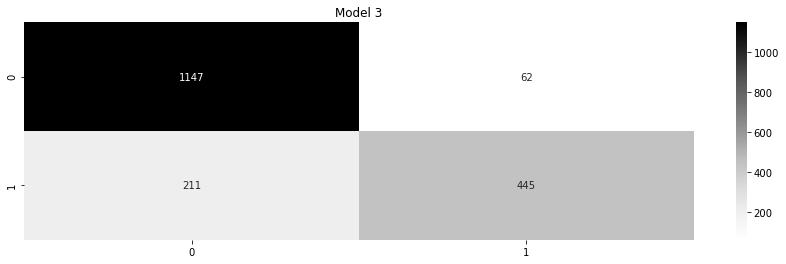

In [99]:
a = sns.heatmap((metrics.confusion_matrix(df_test['Scholarship'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys');
a.set_title('Model 3');

In [100]:
tn_test_m3, fp_test_m3, fn_test_m3, tp_test_m3 = metrics.confusion_matrix(df_test['Scholarship'],model_3_test_class).ravel()
print('Model 3:')
print('True Negative:',tn_test_m3,'\n''False Positives:' 
      ,fp_test_m3,'\n''False Negatives:', fn_test_m3,'\n''True Positives:', tp_test_m3)

Model 3:
True Negative: 1147 
False Positives: 62 
False Negatives: 211 
True Positives: 445


In [101]:
print('Model 3')
print(metrics.classification_report(df_test['Scholarship'],model_3_test_class))

Model 3
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1209
           1       0.88      0.68      0.77       656

    accuracy                           0.85      1865
   macro avg       0.86      0.81      0.83      1865
weighted avg       0.86      0.85      0.85      1865



In [102]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [103]:
#save the classification report in dataset
m3_train_cm=classification_report(df_train['Scholarship'],model_3_train_class,output_dict=True)

#transpose the dataset
m3_cm_train_temp=pd.DataFrame(m3_train_cm).transpose()

#fetch the key metrics from the table
m3_train_f1=round(m3_cm_train_temp.loc["1"][2],2)
m3_train_recall=round(m3_cm_train_temp.loc["1"][1],2)
m3_train_precision=round(m3_cm_train_temp.loc["1"][0],2)

In [104]:
#save the classification report in dataset
m3_test_cm=classification_report(df_test['Scholarship'],model_3_test_class,output_dict=True)

#transpose the dataset
m3_cm_test_temp=pd.DataFrame(m3_test_cm).transpose()

#fetch the key metrics from the table
m3_test_f1=round(m3_cm_test_temp.loc["1"][2],2)
m3_test_recall=round(m3_cm_test_temp.loc["1"][1],2)
m3_test_precision=round(m3_cm_test_temp.loc["1"][0],2)

### Custom cutoff set to maximise accuracy.

We will do this exercise only on the training data.

In [105]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(df_train['Scholarship'])):#defining a loop for the length of the test data
        if np.array(model_3_train_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(df_train['Scholarship'],custom_cutoff_data),3))
    print('F1 Score',round(metrics.f1_score(df_train['Scholarship'],custom_cutoff_data),3),'\n')
    #plt.figure(figsize=(6,4))
    #print('Confusion Matrix')
    #sns.heatmap(metrics.confusion_matrix(df_train['Scholarship'],custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    #plt.show();

0.1 

Accuracy Score 0.481
F1 Score 0.55 

0.2 

Accuracy Score 0.677
F1 Score 0.634 

0.3 

Accuracy Score 0.777
F1 Score 0.699 

0.4 

Accuracy Score 0.827
F1 Score 0.741 

0.5 

Accuracy Score 0.847
F1 Score 0.753 

0.6 

Accuracy Score 0.849
F1 Score 0.742 

0.7 

Accuracy Score 0.837
F1 Score 0.706 

0.8 

Accuracy Score 0.81
F1 Score 0.635 

0.9 

Accuracy Score 0.747
F1 Score 0.443 



We see that __0.5 and 0.6__ gives __better accuracy__ than the rest of the custom cut-off values. But __0.5 cut-off gives us the best 'f1-score'__. Here, we will take the __cut-off as 0.5 (which is bydefault)__ to get the optimum 'f1' score. 

### AUC - ROC curve

Model 3 Train AUC: 0.82700


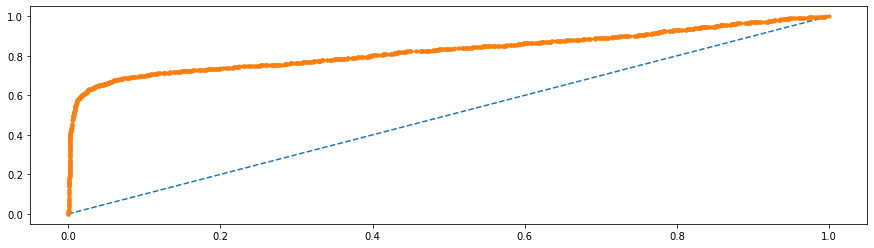

In [106]:
# AUC and ROC for the model 3

auc_train_m3 = metrics.roc_auc_score(df_train['Scholarship'],model_3_train_prob[:, 1])
print('Model 3 Train AUC: %.5f' % auc_train_m3)
fpr_train_m3, tpr_train_m3, thresholds_train_m3 = metrics.roc_curve(df_train['Scholarship'],model_3_train_prob[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_train_m3, tpr_train_m3, marker='.') 
plt.show()

Model 3 Test AUC: 0.83566


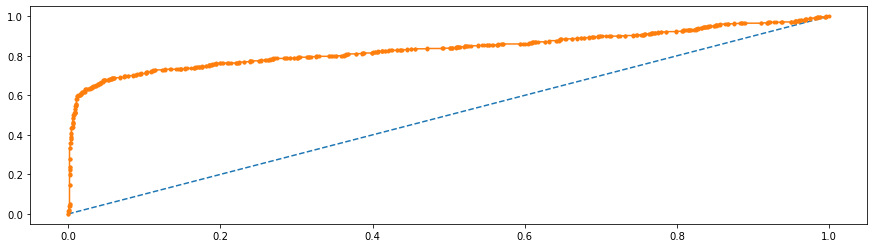

In [107]:
# AUC and ROC for the model 3

auc_test_m3 = metrics.roc_auc_score(df_test['Scholarship'],model_3_test_prob[:, 1])
print('Model 3 Test AUC: %.5f' % auc_test_m3)
fpr_test_m3, tpr_test_m3, thresholds_test_m3 = metrics.roc_curve(df_test['Scholarship'],model_3_test_prob[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr_test_m3, tpr_test_m3, marker='.') 
plt.show()

In [108]:
pd.options.display.float_format = "{:,.4f}".format
comparison_Q3 = pd.DataFrame({'Full Data_final model' : [auc_m3,model_3_score,m3_recall,m3_precision,m3_f1],
                           'Train Data_final model' : [auc_train_m3,model_3_train_score,m3_train_recall,m3_train_precision,m3_train_f1],
                           'Test Data_final model' : [auc_test_m3,model_3_test_score,m3_test_recall,m3_test_precision,m3_test_f1]},
                           index = ['AUC', 'Accuracy', 'Recall','Precision','F1 Score'])
comparison_Q3

,Full Data_final model,Train Data_final model,Test Data_final model
AUC,0.8298,0.8270,0.8357
Accuracy,0.8504,0.8474,0.8536
Recall,0.6700,0.6600,0.6800
Precision,0.8800,0.8700,0.8800
F1 Score,0.7600,0.7500,0.7700


__Insights for Q3:__

1. We have used __all three models which were developed during question2__ and based on that mentioned below were __the result for model accuracy__:

      - Model1 Accuracy: (Train: __85.5%__ , Test: __86.8%__)
      - Model2 Accuracy: (Train: __85.5%__ , Test: __86.8%__)
      - Model3 Accuracy: (Train: __84.7%__ , Test: __85.4%__)

    We are choosing __Model3 as final version__ because:
        - Model is significant (p-value less than 0.05 for all variables) 
        - Model is free of multicollinearity
        - Accuracy variation between train and test is very minimal
2. Compared Q2 final model and Q3 final model and mentioned below is the inferences:
    - Q3 model has higher AUC score, Accuracy, Recall than Q2 AUC
    
3. Further, we have checked the custom cut-off to see if we could increase the accuracy and f1-score and found, __0.5 and 0.6__ gives __better accuracy__ than the rest of the custom cut-off values. But __0.5 cut-off gives us the best 'f1-score'__. Here, we will take the __cut-off as 0.5 (which is bydefault)__ to get the optimum 'f1' score.

    
Hence, we suggest to go with Question3 train and test split model.
    

## ------------------------     Question3 : Logistic Regression TRAIN & TEST ENDS ---------------------------

## Question4:

## Use the same training-test data split in Part (3) to develop a suitable linear discriminant model. Use the same to predict discriminant scores for the test data. Compare the final output from the logistic regression model and LDA.
    

In [109]:
# Checking the dimensions of the training and test data

print('df_train:',df_train.shape)
print('df_test:',df_test.shape)
print('Total Count:',df_dummy.shape[0])

df_train: (4350, 11)
df_test: (1865, 11)
Total Count: 6215


In [110]:
df_train['Scholarship'].value_counts(1)

0   0.6480
1   0.3520
Name: Scholarship, dtype: float64

In [111]:
df_test['Scholarship'].value_counts(1)

0   0.6483
1   0.3517
Name: Scholarship, dtype: float64

In [112]:
df_train.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
2015,5.7000,0.3300,0.1500,1,0.6200,9.9000,0,1,0,1,0
3221,6.2000,0.3000,0.2100,1,0.4200,12.2000,0,0,0,0,0


In [113]:
df_test.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_C,School_Type_D,Region_Southern,Region_Western
1556,7.9000,0.2200,0.4900,2,0.3900,10.5000,0,1,0,1,0
1387,7.4000,0.1600,0.4900,1,0.4700,11.2000,1,0,0,0,0


### Overall significance of the model using MANOVA

In [114]:
from statsmodels.multivariate.manova import MANOVA

__HYPOTHESIS:__


__H0 (NULL):__ No independent variables is significant discriminator of predictor variable (scholarship)

__Ha (ALTERNATE):__ Atleast one independent variables is significant discriminator of predictor variable (scholarship)

In [115]:
manova_model1 = MANOVA.from_formula('Academic_Score+Score_on_Plays_Made+Missed_Play_Score+Injury_Propensity+School_Score+Overall_Score+School_Type_C+School_Type_D+Region_Southern+Region_Western~Scholarship', data=df_train)
print(manova_model1.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value    Num DF   Den DF   F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda   0.0072 10.0000 4339.0000 59993.6653 0.0000
         Pillai's trace   0.9928 10.0000 4339.0000 59993.6653 0.0000
 Hotelling-Lawley trace 138.2661 10.0000 4339.0000 59993.6653 0.0000
    Roy's greatest root 138.2661 10.0000 4339.0000 59993.6653 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
          Scholarship       Value   Num DF   Den DF  F Value  Pr > F
--------------------------------------------------------------------
              Wilks' lambda 0.5887 10.0000 4339.0000 303

### LDA using scikit learn

In [116]:
X_train = df_train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']]
Y_train = df_train['Scholarship']

In [117]:
X_test = df_test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','Injury_Propensity','School_Score','Overall_Score','School_Type_C','School_Type_D','Region_Southern','Region_Western']]
Y_test = df_test['Scholarship']

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)  
LDA_model = lda.fit(X_train, Y_train)

In [119]:
feature_names = X_train.columns

In [120]:
#Group means
LDA_model.means_
df_means = np.round(pd.DataFrame(LDA_model.means_, columns=feature_names),2)
df_means

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,6.8600,0.2800,0.3400,2.3600,0.4900,10.4800,0.5000,0.1600,0.3100,0.2200
1,7.9200,0.4400,0.3000,1.6900,0.6000,10.4300,0.6100,0.2700,0.1900,0.3700


In [121]:
#Prior probabilities
LDA_model.priors_

array([0.64804598, 0.35195402])

### Model Predictions (LDA)

In [122]:
#Predict Class (Train)
pred_train=LDA_model.predict(X_train)
pred_train[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [123]:
#Predict Class (Test)
pred_test=LDA_model.predict(X_test)
pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [124]:
#Predict Probability (Train)
LDA_model_train_prob = LDA_model.predict_proba(X_train).round(2)
LDA_model_train_prob

array([[0.66, 0.34],
       [0.89, 0.11],
       [0.12, 0.88],
       ...,
       [0.95, 0.05],
       [0.97, 0.03],
       [0.99, 0.01]])

In [125]:
#Predict Probability (Test)
LDA_model_test_prob = LDA_model.predict_proba(X_test).round(2)
LDA_model_test_prob

array([[0.9 , 0.1 ],
       [0.95, 0.05],
       [0.99, 0.01],
       ...,
       [0.09, 0.91],
       [0.97, 0.03],
       [0.08, 0.92]])

In [126]:
#Obtaining Discriminant Scores
Scores_test=LDA_model.decision_function(X_test)
Scores_test=pd.DataFrame(Scores_test)
Scores_test.round(2)[:10]

,0
0,-2.2200
1,-2.9900
2,-4.8500
3,-3.2800
4,-0.2700
5,-1.6800
6,-2.7100
7,1.8400
8,-1.8600
9,-3.0900


### Between-groups Variance and Within-groups Variance for a Variable
If we want to calculate the within-groups variance for a particular variable, we can use the function calcWithinGroupsVariance() below:

In [127]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = np.round(numtotal / (denomtotal - numlevels),2)
    return Vw

In [128]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = np.round(numtotal / (numlevels - 1),2)
    return(Vb)

In [129]:
def calcSeparations1(variables, groupvariable):
    # calculate the separation for each variable
    df = pd.DataFrame({'XVar': [], 'Vw': [], 'Vb': [],  'wilks':[]})
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        wilks = np.round(Vw/(Vb+Vw),3)
        #print(variablename, "Vw=", Vw, "Vb=", Vb, "sep=", sep)
        df = df.append({'XVar': variablename, 'Vw': Vw, 'Vb': Vb,  'wilks':wilks}, ignore_index=True)
    df.sort_values('wilks', ascending=True, inplace=True)
    return df

In [130]:
calcSeparations1(X_train, Y_train)

,XVar,Vw,Vb,wilks
0,Academic_Score,1.4500,"1,126.1300",0.0010
1,Score_on_Plays_Made,0.0200,26.8800,0.0010
4,School_Score,0.0200,12.4300,0.0020
3,Injury_Propensity,1.2500,457.2100,0.0030
9,Region_Western,0.1900,20.9000,0.0090
8,Region_Southern,0.1900,14.3600,0.0130
2,Missed_Play_Score,0.0200,1.4500,0.0140
7,School_Type_D,0.1600,11.4600,0.0140
6,School_Type_C,0.2500,12.3600,0.0200
5,Overall_Score,1.3800,2.4200,0.3630


### Model Performance - LDA

In [131]:
#Accuracy (Train)
LDA_train_score = LDA_model.score(X_train,Y_train)
LDA_train_score

0.8581609195402299

In [132]:
#Accuracy (Test)
LDA_test_score = LDA_model.score(X_test,Y_test)
LDA_test_score

0.868632707774799

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, pred_test)
cm

array([[1163,   46],
       [ 199,  457]], dtype=int64)

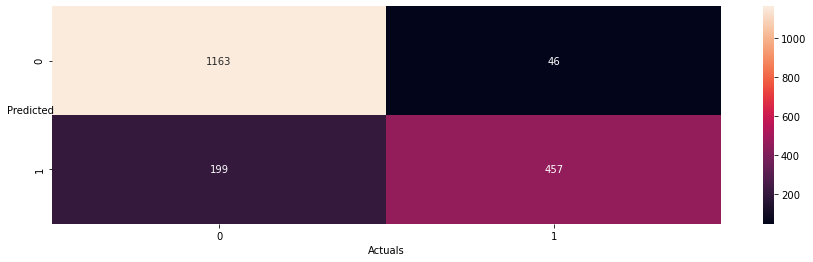

In [134]:
sns.heatmap(metrics.confusion_matrix(Y_test,pred_test),annot=True
            ,fmt='.5g')
plt.xlabel('Actuals')
plt.ylabel('Predicted',rotation=0)
plt.show()

In [135]:
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2819
           1       0.90      0.67      0.77      1531

    accuracy                           0.86      4350
   macro avg       0.87      0.82      0.83      4350
weighted avg       0.86      0.86      0.85      4350



In [136]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1209
           1       0.91      0.70      0.79       656

    accuracy                           0.87      1865
   macro avg       0.88      0.83      0.85      1865
weighted avg       0.87      0.87      0.86      1865



In [137]:
#save the classification report in dataset
LDA_train_cm=classification_report(Y_train,pred_train,output_dict=True)

#transpose the dataset
LDA_train_cm_temp=pd.DataFrame(LDA_train_cm).transpose()

#fetch the key metrics from the table
LDA_train_f1=round(LDA_train_cm_temp.loc["1"][2],2)
LDA_train_recall=round(LDA_train_cm_temp.loc["1"][1],2)
LDA_train_precision=round(LDA_train_cm_temp.loc["1"][0],2)

In [138]:
#save the classification report in dataset
LDA_test_cm=classification_report(Y_test,pred_test,output_dict=True)

#transpose the dataset
LDA_test_cm_temp=pd.DataFrame(LDA_test_cm).transpose()

#fetch the key metrics from the table
LDA_test_f1=round(LDA_test_cm_temp.loc["1"][2],2)
LDA_test_recall=round(LDA_test_cm_temp.loc["1"][1],2)
LDA_test_precision=round(LDA_test_cm_temp.loc["1"][0],2)

AUC: 0.816254


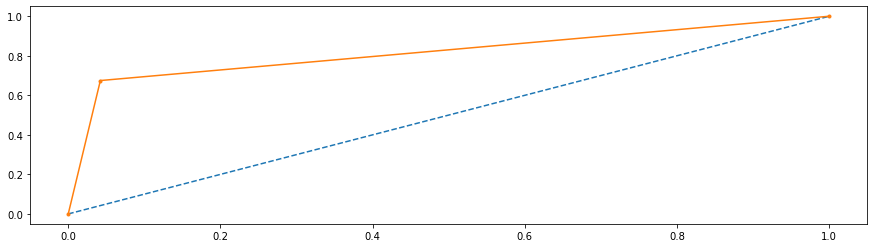

In [139]:
# AUC and ROC for the data (Train)

# calculating on the basis of a person not defaulting
# calculate AUC
auc_train_LDA = metrics.roc_auc_score(Y_train,pred_train)
print('AUC: %.6f' % auc_train_LDA)

# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_train_LDA, tpr_train_LDA, thresholds_train_LDA = metrics.roc_curve(Y_train,pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_train_LDA, tpr_train_LDA, marker='.')
# show the plot
plt.show()

AUC: 0.829299


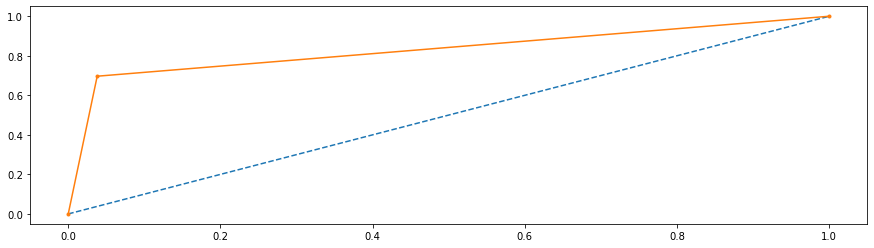

In [140]:
# AUC and ROC for the data (Test)

# calculating on the basis of a person not defaulting
# calculate AUC
auc_test_LDA = metrics.roc_auc_score(Y_test,pred_test)
print('AUC: %.6f' % auc_test_LDA)

# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = metrics.roc_curve(Y_test,pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_test_LDA, tpr_test_LDA, marker='.')
# show the plot
plt.show()

__Insights for Q4:__

1. We have used __train and test split data and developed LDA model__ and mentioned below is the summary around the same:
      - Overall significance of the model using MANOVA is significant which means _atleast one independent variables is significant discriminator of predictor variable __(scholarship)___
      - We performed __group means, prior model probability, predicted classes & probabilities__ for __train and test data of independent variables__.
      - We also calculated __Discriminant Scores__
      - We also checked __wilk's lamda score__ _(score of extent of "seperation")_ for each independent variables
2. LDA model performance:     
      - AUC        : (Train: __81.6%__ , Test: __82.9%__)
      - Accuracy   : (Train: __85.8%__ , Test: __86.9%__)
      - Recall     : (Train: __67.0%__ , Test: __70.0%__)
      - Precision  : (Train: __90.0%__ , Test: __91.0%__)      
      - F1-socre   : (Train: __77.0%__ , Test: __79.0%__)    

In [141]:
pd.options.display.float_format = "{:,.3f}".format
comparison_Q4 = pd.DataFrame({'Train Data_Logistic model' : [auc_train_m3,model_3_train_score,m3_train_recall,m3_train_precision,m3_train_f1],
                                'Test Data_Logistic model' : [auc_test_m3,model_3_test_score,m3_test_recall,m3_test_precision,m3_test_f1],
                                'Train Data_LDA model' : [auc_train_LDA,LDA_train_score,LDA_train_recall,LDA_train_precision,LDA_train_f1],
                                'Test Data_LDA model' : [auc_test_LDA,LDA_test_score,LDA_test_recall,LDA_test_precision,LDA_test_f1]},
                           index = ['AUC', 'Accuracy', 'Recall','Precision','F1 Score'])
comparison_Q4

,Train Data_Logistic model,Test Data_Logistic model,Train Data_LDA model,Test Data_LDA model
AUC,0.827,0.836,0.816,0.829
Accuracy,0.847,0.854,0.858,0.869
Recall,0.660,0.680,0.670,0.700
Precision,0.870,0.880,0.900,0.910
F1 Score,0.750,0.770,0.770,0.790


In [142]:
tn_test_m3, fp_test_m3, fn_test_m3, tp_test_m3 = metrics.confusion_matrix(df_test['Scholarship'],model_3_test_class).ravel()
print('Logistic Model:')
print('True Negative:',tn_test_m3,'\n''False Positives:' 
      ,fp_test_m3,'\n''False Negatives:', fn_test_m3,'\n''True Positives:', tp_test_m3)

Logistic Model:
True Negative: 1147 
False Positives: 62 
False Negatives: 211 
True Positives: 445


In [143]:
tn_test_LDA, fp_test_LDA, fn_test_LDA, tp_test_LDA = metrics.confusion_matrix(Y_test,pred_test).ravel()
print('LDA Model:')
print('True Negative:',tn_test_LDA,'\n''False Positives:' 
      ,fp_test_LDA,'\n''False Negatives:', fn_test_LDA,'\n''True Positives:', tp_test_LDA)

LDA Model:
True Negative: 1163 
False Positives: 46 
False Negatives: 199 
True Positives: 457


__Logistic final model & LDA model comparision:__

Mentioned below are the major charactrics to select which model is more suitable:

1. LDA model has less false negatives (i.e. __199__) (which means model has predicted "partial scholarship" but actual was "full scholarship") than Logistic model (i.e. __211__). In other words, LDA model has __6% less Type-I error__ than Logistic model)

2. LDA model has higher accuracy, F1-score than logistic model.

Basis of these justification we could conclude that,

## LDA model is more suitable than Logistic model




__Suggestion on LDA model:__

The model accuracy on the training as well as the test set is __~86%__, which is roughly the same proportion as the _class 1 observations_ in the dataset. This model is affected by __a class imbalance problem__. Since we only have __6215 observations__, if re-build the same LDA model with _more number of data points, an even better model could be built_.

## ----------------------------------------     Question4 : LDA ENDS ---------------------------------------------